In [ ]:
!pip install cmaes
!pip install matplotlib

In [1]:
from cmaes import CMA
import numpy as np
import matplotlib.pyplot as plt

The avg_score of generation 0 is: 0.4515381638771616
The avg_score of generation 1 is: 0.4290209522377588
The avg_score of generation 2 is: 0.4076173132502185
The avg_score of generation 3 is: 0.3211309978631666
The avg_score of generation 4 is: 0.2199624777777109
The avg_score of generation 5 is: 0.13970901923021878
The avg_score of generation 6 is: 0.1371129567736806
The avg_score of generation 7 is: 0.09917628807634023
The avg_score of generation 8 is: 0.06885327561678327
The avg_score of generation 9 is: 0.07722454048138395
The avg_score of generation 10 is: 0.09122533022707487
The avg_score of generation 11 is: 0.05672011723190898
The avg_score of generation 12 is: 0.04551131331372926
The avg_score of generation 13 is: 0.03904117794259597
The avg_score of generation 14 is: 0.06673382490145209
The avg_score of generation 15 is: 0.02208663743447917


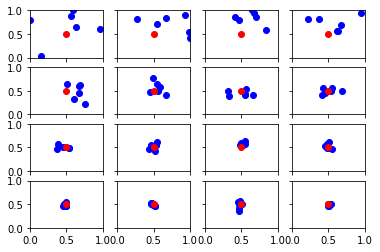

In [33]:
target = np.array((0.5, 0.5))

def evaluate(point):
    return np.sqrt(((point-target)**2).sum())

# define start values of mean, standard deviation and bounds
optimizer = CMA(mean=np.array([0.5, 0.5]), bounds=np.array([[0,1], [0,1]]), sigma=0.5, n_max_resampling=1)
# set number of generations (iterations)
generations = 16

# plots
sqrt = int(np.sqrt(generations))
fix, axs = plt.subplots(sqrt, sqrt, num="CMA-ES", sharex=True, sharey=True)
points = np.ndarray((generations, optimizer.population_size, 2))

# algorithm
for g in range(generations):
    solutions = []
    avg_score = 0
    for i in range(optimizer.population_size):
        point = optimizer.ask()
        points[g,i] = point
        # evaluate point with respect to the target
        score = evaluate(point)
        avg_score += score
        solutions.append((point, score))
    print("The avg_score of generation {} is: {}".format(g, avg_score / optimizer.population_size))        
    optimizer.tell(solutions)
    
for i in range(generations):
    ax = axs[i//sqrt,i%sqrt]
    ax.scatter(*zip(*points[i]),c="b")
    ax.scatter(*target,c="r")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])